# Hackathon Workshop Demo Notebook

In [1]:
import pandas as pd

# read in the csv and put it into a Pandas DataFrame - a type of data structure
df = pd.read_csv("human-resources-analytics/HR_comma_sep.csv")

print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


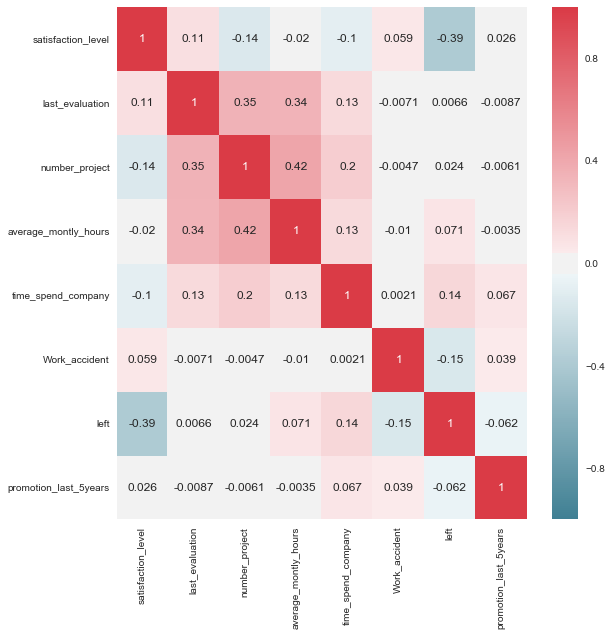

In [2]:
%matplotlib inline
#Data visualization for the hell of it
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()


In [3]:
from sklearn.model_selection import train_test_split

# X = df.drop(['left', 'sales', 'salary'], axis=1)
# y = df['left']

# drop all unnecessary columns and the 'Y' (which is the column we will be predicting)
X = df.drop(['sales', 'salary', 'left', 'satisfaction_level'], axis=1)
# grab the column that will be predicted on
y = df['satisfaction_level']

# split the data to train and test sets to prevent data snooping
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# instantiate the sklearn model
clf = svm.SVR()
# clf = RandomForestClassifier(n_estimators = 1000)

# train the model or make the model 'learn' based on the X and Y train data
clf.fit(X_train, y_train)


Wall time: 8.73 s


In [20]:
# predict on the X_test
y_pred = clf.predict(X_test)
y_pred

array([ 0.69701555,  0.6349309 ,  0.81726424, ...,  0.46575769,
        0.75323441,  0.67066719])

In [19]:
# score how smart your classifier is based on the ground truth, y_test
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
# accuracy_score(y_test, y_pred)

print("The Mean Squared Error to predict Salary: %.3f" % mse)

The Mean Squared Error to predict Salary: 0.036
